In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

<Container object of 2 artists>

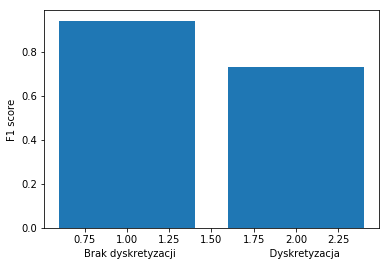

In [2]:
plt.xlabel('Brak dyskretyzacji                              Dyskretyzacja')
plt.ylabel('F1 score')
plt.bar([1,2],[0.94,0.73])

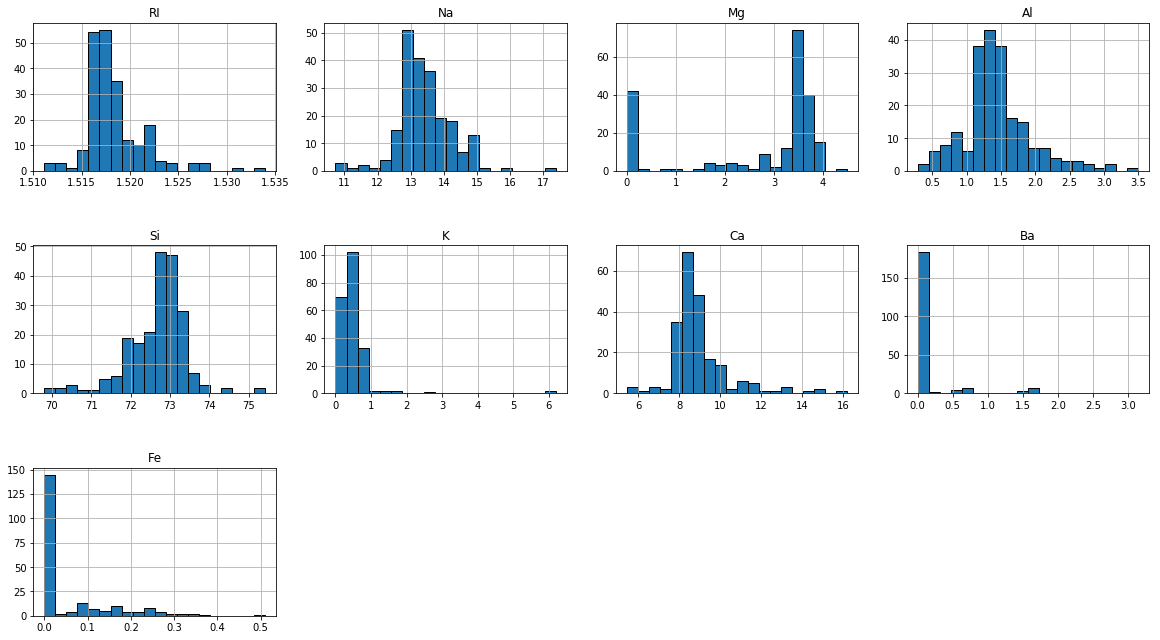

In [3]:
dataset = pd.read_csv('glass.csv')
dataset = dataset.drop(['Id'],1)
columns=dataset.columns[:9]
plt.subplots(figsize=(20,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),4,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    dataset[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [2]:
X = dataset.iloc[:,:9]
Y = dataset.iloc[:,9]

NameError: name 'dataset' is not defined

In [3]:
def discretization(mode, column, bin_count):
    if mode == 'CUT':
        return pd.cut(column, bin_count, labels=False)
    elif mode == 'QCUT':
        return pd.qcut(column, bin_count, labels=False, duplicates='drop')
    else:
        hist, bins_edges = np.histogram(column, bins=mode)
        return np.digitize(column, bin_edges)

In [22]:
data = pd.read_csv('glass.csv')
data = data.drop(['Id'],1)
X = data.iloc[:,:9]
Y = data.iloc[:,9]
folds = 10
skf = StratifiedKFold(n_splits=folds)
discretization_mode = 'QCUT' # CUT, QCUT, doane
bins_count = 10
scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}

In [23]:
# discretization
for column in X:
    bins = discretization(discretization_mode, X[column], bins_count)
    X[column] = bins
    data[column] = bins
    
model = MultinomialNB()

fit = cross_validate(model, X, Y, scoring=scoring, cv=skf, return_train_score=True)
print(sum(fit['test_acc'])/folds)
print(sum(fit['test_f1'])/folds)

0.5655552418595896
0.5463260138554256


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\A

In [64]:
hist,bins_edges = np.histogram(X['Pregnancies'], bins='fd')
np.digitize(X['Pregnancies'], bins_edges)

array([ 8,  3,  8,  3,  1,  8,  5, 10,  3,  8,  5, 10, 10,  3,  8,  8,  1,
        8,  3,  3,  5,  8,  8, 10, 10, 10,  8,  3, 10,  8,  8,  5,  5,  8,
       10,  5, 10, 10,  3,  5,  5,  8,  8, 10,  8,  1,  3,  3,  8,  8,  3,
        3,  8,  8,  8,  3,  8,  1,  1,  1,  3,  8,  8,  3,  8,  8,  1,  3,
        3,  5,  3,  8, 10,  5,  3,  3,  8,  8,  1,  3,  5,  3,  8,  1,  8,
        3, 10,  3, 10,  3,  3,  5,  8,  5,  3,  8,  3,  3,  8,  3,  3,  3,
        1,  3,  3,  3,  3,  5,  5,  1,  5,  8,  3,  5,  8,  5,  8,  8,  5,
        5,  1,  8,  3,  8,  1,  3,  5,  3,  3,  1,  5, 10,  5,  8,  3,  3,
        1,  1,  1,  8,  5,  8,  3, 10,  5,  1, 10,  3,  8,  3,  3,  5, 10,
        3,  8,  8,  3,  3,  3, 13,  5,  8,  1,  3,  1,  8,  5,  5,  5,  5,
        8,  8,  3,  3,  3,  8,  8,  1,  8,  8,  8,  1,  3,  8,  5,  8,  8,
        3,  8,  8,  5, 10,  8, 10,  8,  8,  3,  5,  5,  5,  1,  3,  1,  3,
        8,  8,  8,  8,  3,  8,  3,  1,  8,  1, 10, 10,  8,  8,  8,  8,  1,
        3,  8,  8,  3,  3

In [293]:
dataset2 = pd.read_csv('pima-indians-diabetes2.csv')
X2 = dataset2.iloc[:,1:9]
Y2 = dataset2.iloc[:,9]
def convert_to_intervals(dataset):
    for col in dataset:
        index = 0
        print(col)
        for row in dataset[col]:
            i = str(row).split('_to_')
            for t in i:
                t.replace('(','').replace('(','').replace(')','').replace(']','')
#                 if t == '-inf':
#                     t = min(data[col])
#                 elif t == 'inf':
#                     t = max(data[col])
            i[0] = i[0].replace('-inf', str(min(data[col])))
            i[1] = i[1].replace('inf', str(max(data[col])))
            print(i)
            interval = pd.Interval(i[0], i[1])
            dataset[col][index] = interval
            index += 1
    return dataset

In [294]:
# discretization
X2 = convert_to_intervals(X2)
    
model = GaussianNB()

cross_validate(model, X2, Y2, scoring=scoring, cv=skf, return_train_score=True)

Pregnancies
['0', '6.5']
['0', '6.5']
['6.5', '17']


ValueError: left side of interval must be <= right side